# Select good SED in the catalog

In [98]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from astropy.io import fits

%matplotlib inline
from IPython.display import Image, display
from PIL import Image
from scipy.interpolate import interp1d

In [99]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 6),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [100]:
index_num=0  # index of counts
index_val=1  # index of counts
index_temp=2
index_logg=3
index_logz=4
index_spec=5

## Number of good SED to select

In [101]:
NumberOfSEDToSelect=1000

In [102]:
#input_fits='sedgrid_phoenixmodels_good.fits'
input_fits='sedgrid_phoenixmodels_noextinct.fits'
output_fits='sedgrid_phoenixmodels_selected1000.fits'

In [103]:
hdul = fits.open(input_fits)

In [104]:
hdul.info()


Filename: sedgrid_phoenixmodels_noextinct.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      15   (7005, 22081)   float64   


In [105]:
hdul[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 7005                                                  
NAXIS2  =                22081                                                  
NBSED   =                22080                                                  
NBWLBIN =                 7000                                                  
WLMIN   =               3000.0                                                  
WLMAX   =              11000.0                                                  
SEDMODEL= 'phoenix '                                                            
TMIN    =               4000.0                                                  
TMAX    =              50000.0                                                  
TSTEP   =                100

In [106]:
data = hdul[0].data

# Show all spectra

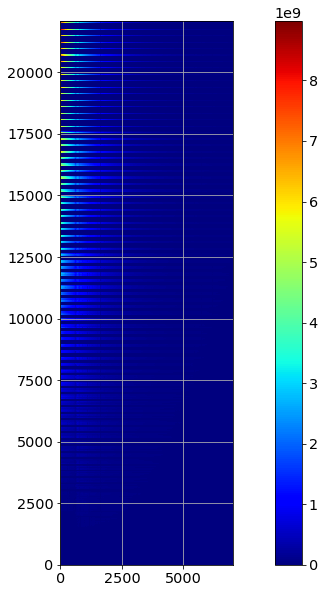

In [107]:
plt.figure(figsize=(15,10))    
img=plt.imshow(data[1:,index_spec:],origin='lower',cmap='jet')
plt.colorbar(img)
plt.grid(True)
plt.show()

# Show wavelength range

Text(0.5,0,u'Wavelength index')

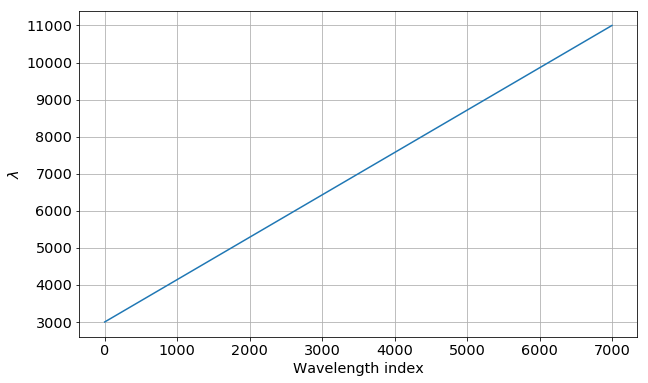

In [108]:
plt.plot(data[0,index_spec:])
plt.grid()
plt.ylabel("$\lambda$")
plt.xlabel("Wavelength index")

# Show good and bad indexes 

## Good indexes

In [109]:
good_indexes=np.where(data[0:,index_val]>0)[0]

In [110]:
good_indexes

array([    3,     4,     5, ..., 22070, 22071, 22072])

## Bad indexes

In [111]:
bad_indexes=np.where(data[0:,index_val]<=0)[0]

# Select good indexes

In [112]:
good_image=data[good_indexes,:]

In [113]:
good_image.shape

(11102, 7005)

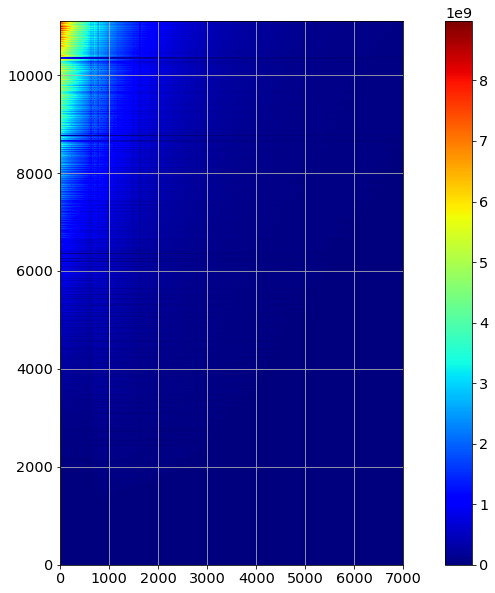

In [114]:
plt.figure(figsize=(15,10))   
img=plt.imshow(good_image[1:,index_spec:],origin='lower',cmap='jet')
plt.colorbar(img)
plt.grid(True)
plt.show()

# Creation of output table

In [115]:
data_out=np.zeros((NumberOfSEDToSelect+1,data.shape[1]))

In [116]:
data_out[0,index_spec:]=data[0,index_spec:]

In [117]:
count=0
while count<NumberOfSEDToSelect:
    ridx=np.random.randint(1,data.shape[0]+1,1)[0]
    if ridx in good_indexes:
        #print ridx
        count+=1
        data_out[count,:]=data[ridx,:]

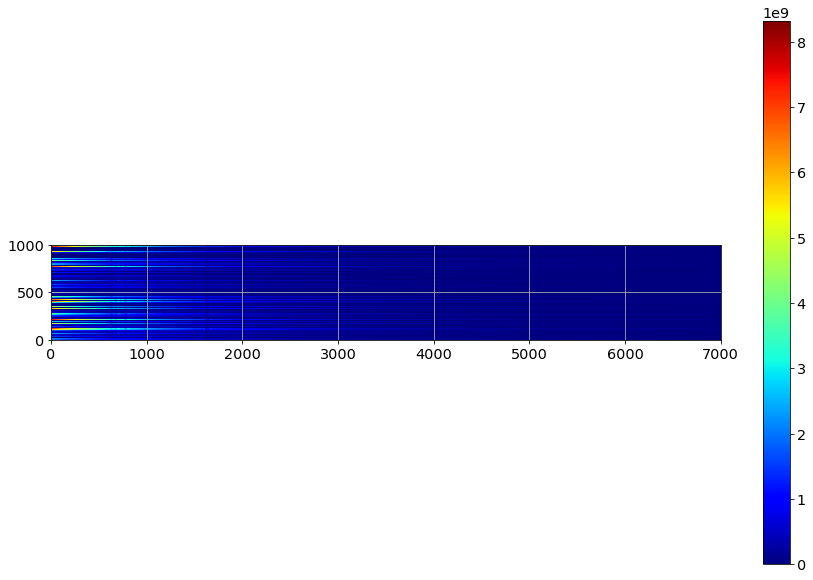

In [118]:
plt.figure(figsize=(15,10))   
img=plt.imshow(data_out[1:,index_spec:],origin='lower',cmap='jet')
plt.colorbar(img)
plt.grid(True)
plt.show()

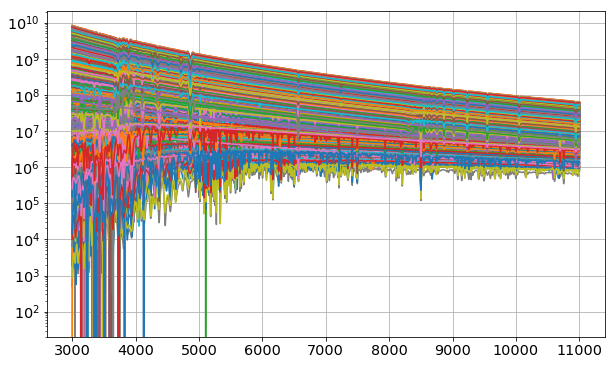

In [119]:
for idx in np.arange(1,NumberOfSEDToSelect+1):
    plt.semilogy(data_out[0,index_spec:],data_out[idx,index_spec:],'-')
plt.grid()

Text(0.5,0,u'temperature')

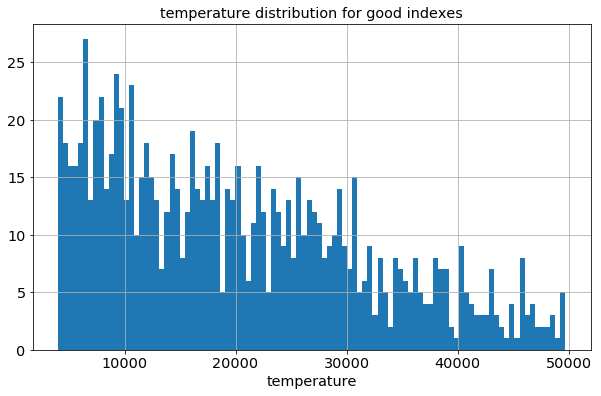

In [120]:
plt.hist(data_out[1:,index_temp],bins=100);
plt.grid()
plt.title('temperature distribution for good indexes')
plt.xlabel('temperature')

Text(0.5,0,u'log(G)')

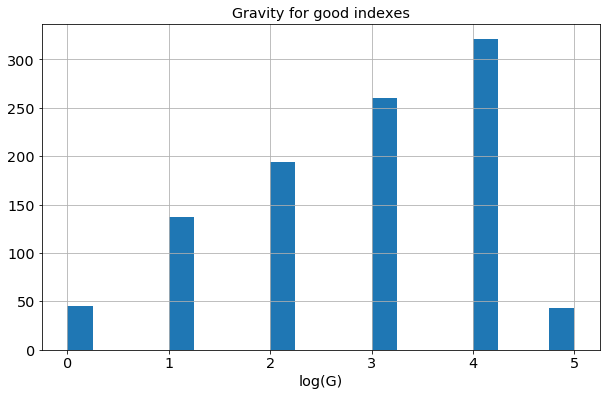

In [121]:
plt.hist(data_out[1:,index_logg],bins=20);
plt.grid()
plt.title('Gravity for good indexes')
plt.xlabel('log(G)')

Text(0.5,0,u'log(Z)')

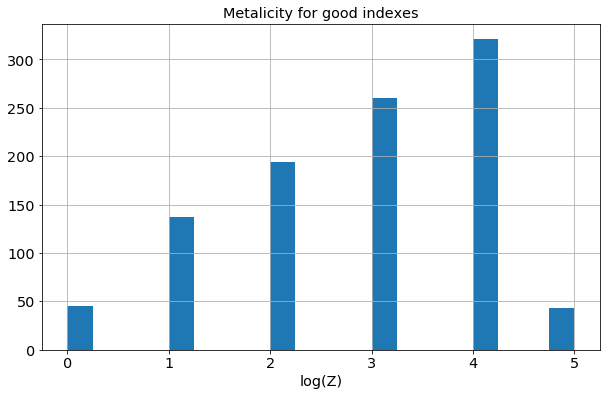

In [122]:
plt.hist(data_out[1:,index_logg],bins=20);
plt.grid()
plt.title('Metalicity for good indexes')
plt.xlabel('log(Z)')

In [123]:
hdu = fits.PrimaryHDU(data_out,header=hdul[0].header)
hdu.writeto(output_fits,overwrite=True)